**Classification_Class**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('datasets/housing/housing.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [64]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploring Class

In [121]:
class Exploring:
    
    def __init__(self, dataset):
        self.dataset = dataset
        
    def corr_matrix(self, target=None, heatmap=None, **kwargs_plot):
        corr_matrix = self.dataset.corr()
        if target: 
            result = corr_matrix[target].sort_values(ascending=False)
            return pd.DataFrame(result)
        elif heatmap:
            import seaborn as sns
            fig, ax = plt.subplots(figsize=(12,8))
            sns.heatmap(corr_matrix, alpha=.9, cmap=plt.get_cmap("coolwarm"), **kwargs_plot)
            return None
        else:
            return corr_matrix
        
    def plot_corr_matrix(self, subset=None, **kwargs_plot):
        from pandas.plotting import scatter_matrix as scatter_matrix
        if subset:
            scatter_matrix(self.dataset[subset],figsize=(12,8), **kwargs_plot)
            plt.show()
            return None
        else:
            scatter_matrix(self.dataset,figsize=(12,8))
            plt.show()
            return None
    
    def plot_geo(self, x, y, var, **kwargs_plot):
        from matplotlib import pyplot as plt
        x_value = self.dataset[x]
        y_value = self.dataset[y]
        z_value = self.dataset[var]
        fig, ax = plt.subplots(figsize=(12,8))
        ax_color = ax.scatter(x_value, y_value, 
                    c=z_value,
                    label=var,
                    cmap=plt.get_cmap("jet"),
                    **kwargs_plot)
        cbar = fig.colorbar(ax_color)
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        plt.legend()
        plt.show()
        return None

    def plot_percentil(self, var1, var2, percentiles=[.25, .50, .75], table=None, **kwargs_plot):
        array_percentil = self.dataset[var1].describe(percentiles)
        index_percentil = list(str(int(per*100)).replace('0.', '')+'%' for per in percentiles)
        label = index_percentil + ['max']
        self.dataset['group_'+var1] = pd.cut(self.dataset[var1],
                                       bins=array_percentil[['min']+index_percentil+['max']],
                                       labels=label)
        df_mean  = pd.DataFrame(self.dataset.groupby(by='group_'+var1)[var2].mean())
        df_count = pd.DataFrame(self.dataset.groupby(by='group_'+var1)[var2].count())
        df_std   = pd.DataFrame(self.dataset.groupby(by='group_'+var1)[var2].std())
        
        df_final = df_mean.join(df_count, rsuffix='_count').join(df_std, rsuffix='_std')
        if table:
            return df_final
        else:
            df_final[var2+'_std_upper'] = df_final[var2] + df_final[var2+'_std']/2
            df_final[var2+'_std_lower'] = df_final[var2] - df_final[var2+'_std']/2
            x = np.arange(df_final.shape[0])
            y = df_final[var2]
            y2 = df_final[var2+'_count']
            std = df_final[var2+'_std']
            std_upper = df_final[var2+'_std_upper']
            std_lower = df_final[var2+'_std_lower']
            fig, ax1 = plt.subplots(figsize=(12,8))
            ax1.plot(x, y, color='black', alpha=0.6)
            ax1.plot(x, std_lower, color='black', alpha=0.3)
            #ax1.stackplot(x, std_upper, std_lower)
            ax1.plot(x, std_upper, color='black', alpha=0.3)
            ax1.set_xlabel('Percentil '+var1)
            ax1.set_ylabel('mean_'+var2)
            ax2 = ax1.twinx()
            ax2.set_ylabel('Volumetria')
            ax2.bar(x, y2, width=0.2, alpha=.3, color='green')
            plt.xticks(x, label)
            return None

    def boxplot_normalized(self, drop_columns=None):
        df_numerical = self.dataset._get_numeric_data()
        df_box = (df_numerical - df_numerical.mean())/df_numerical.std()
        if drop_columns:
            df_box.drop(drop_columns, axis=1, inplace=True)
        fig, ax1 = plt.subplots(figsize=(12,8))
        sns.boxplot(data=df_box)
        plt.show()
        return None
        
    def data_info(self):
        info = pd.DataFrame()
        info["var"] = self.dataset.columns
        info["# missing"] = list(self.dataset.isnull().sum())
        info["% missing"] = info["# missing"] / self.dataset.shape[0]*100
        info["types"] = list(self.dataset.dtypes)
        info["unique values"] = list(len(self.dataset[var].unique()) for var in self.dataset.columns)
        return info

Try

In [117]:
df_teste = df.copy()

**Boxplot Normalized**

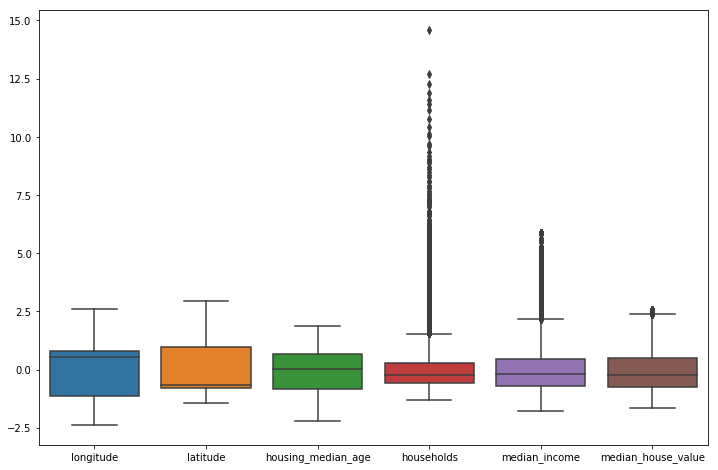

In [118]:
O = Exploring(df)
O.boxplot_normalized(drop_columns=['population','total_rooms', 'total_bedrooms'])

**Percentil Plot**

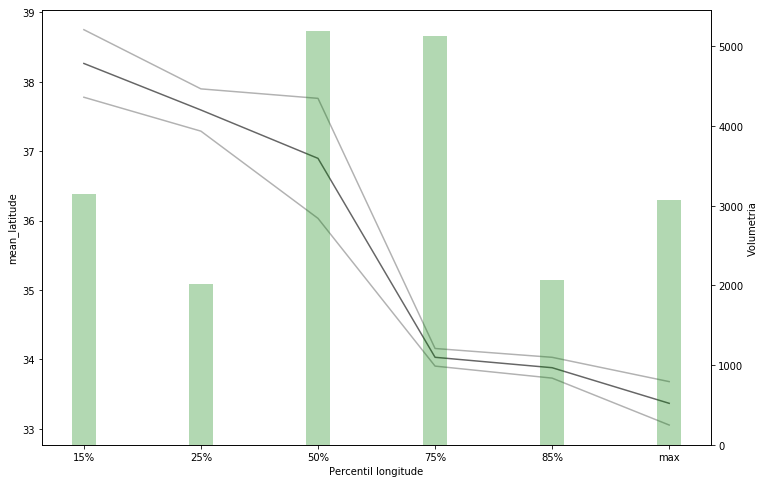

In [122]:
O = Exploring(df)
teste = O.plot_percentil(var1 = 'longitude',
                         var2 = 'latitude', table=False,
                         percentiles = [.15, .25, .5, .75, .85])
teste

In [ ]:
x = np.arange(df_final.shape[0])
y = df_final[var2]
y2 = df_final[var2+'_count']
std_upper = df_final[var2+'_std']
std_lowe = 
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(x, y, color='black', alpha=0.6)
ax1.set_xlabel('Percentil '+var1)
ax1.set_ylabel('mean_'+var2)
ax2 = ax1.twinx()
ax2.set_ylabel('Volumetria')
ax2.bar(x, y2, width=0.2, alpha=.3, color='green')
plt.xticks(x, label)
return None

**GeoPlot**

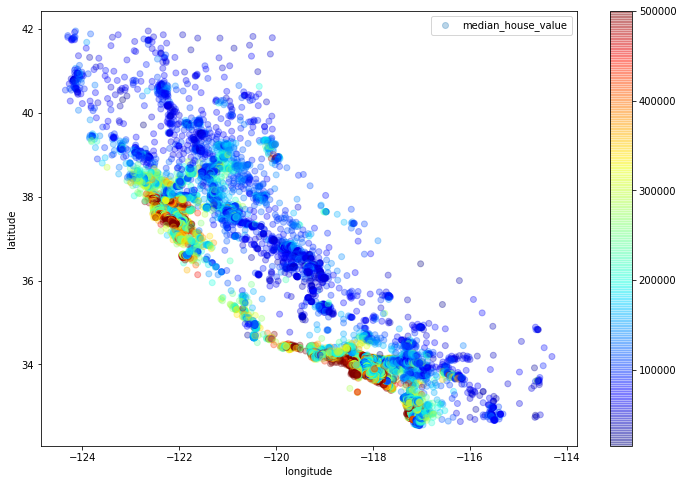

In [85]:
obj = Exploring(df)
obj.plot_geo('longitude', 'latitude', 'median_house_value', alpha=.3)

**Correlation Matrix**

In [86]:
obj = Exploring(df)
obj.corr_matrix()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [87]:
obj.corr_matrix(target='median_house_value')

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


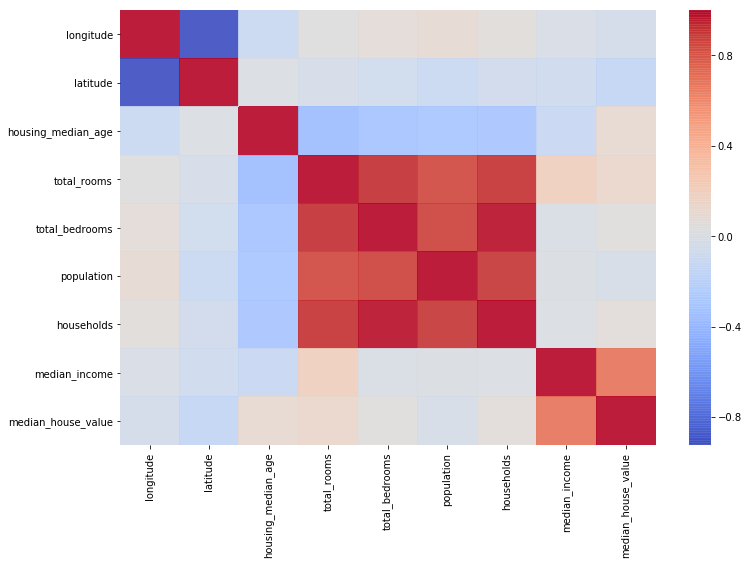

In [88]:
obj.corr_matrix(heatmap=True)

Correlation Matrix

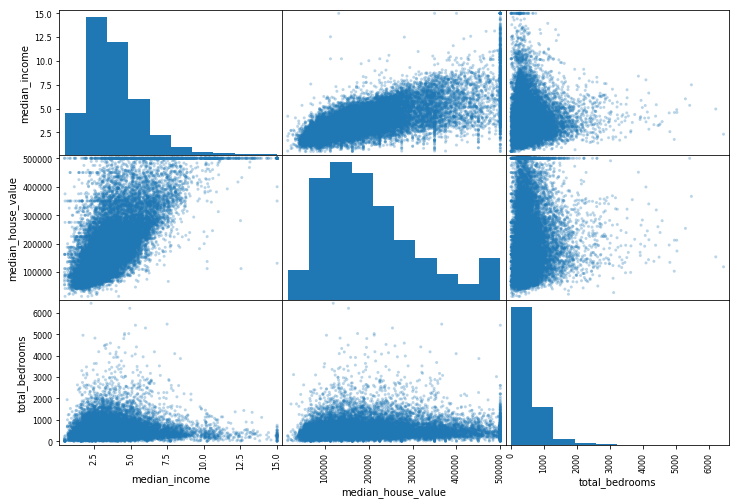

In [89]:
obj = Exploring(df)
obj.plot_corr_matrix(subset=['median_income', 'median_house_value', 'total_bedrooms'], alpha= .3)

**data info**

In [84]:
obj = Exploring(df)
obj.data_info()

,var,# missing,% missing,types,unique values
0,longitude,0,0.000000,float64,844
1,latitude,0,0.000000,float64,862
2,housing_median_age,0,0.000000,float64,52
3,total_rooms,0,0.000000,float64,5926
4,total_bedrooms,207,1.002907,float64,1924
5,population,0,0.000000,float64,3888
6,households,0,0.000000,float64,1815
7,median_income,0,0.000000,float64,12928
8,median_house_value,0,0.000000,float64,3842
9,ocean_proximity,0,0.000000,object,5


## Class Utils

In [ ]:
class utils:
    
    def __init__(self):
        pass
    
    def soft_join(self, table1, table2, threshold, **kwargs_join):
        pass
    
    def others_transform(self, dataset):
        return dataset, encoder

In [ ]:
class dataprep:
    
    def __init__(self, dataset, *args):
        self.dataset = dataset
        self.encoder = kwargs.get('encoder')
        
    

In [ ]:
class classification_class:

    def __init__(self, X_train, y_train, X_test, y_test, *args):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    
    